Tutorial: polar plots for laminate stiffness
==
Date: 30 of January 2025

Author: Saullo G. P. Castro

Cite this tutorial as:

Castro, SGP. Methods for analysis and design of composites (Version 0.7.1) [Computer software]. 2024. https://doi.org/10.5281/zenodo.2871782


Importing dependencies
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from composites import laminated_plate

Defining material properties
---

In [2]:
E11 = 100e9 # [N/m^2]
E22 = 8e9 # [N/m^2]
G12 = G23 = G13 = 8e9 # [N/m^2]
nu12 = 0.29
ply_thickness = 1.25e-4 # [m]
laminaprop = E11, E22, nu12, G12, G13, G23

Creating reference laminate
---

In [3]:
stack_ref = np.asarray([-45, +45, 0, 0, +45, -45], dtype=float)

Calculating membrane stiffness $A_{11}$ in all directions
---

In [4]:
angles = np.linspace(0, 360, 1000, endpoint=False)
A11s = np.zeros_like(angles)
for i, angle in enumerate(angles):
    lam = laminated_plate(stack=stack_ref-angle, plyt=ply_thickness, laminaprop=laminaprop)
    A11s[i] = lam.ABD[0, 0]

Normalizing plots to keep maximum value 1 in the radial coordinate
---

In [5]:
A11s /= A11s.max()

Creating polar plots
---

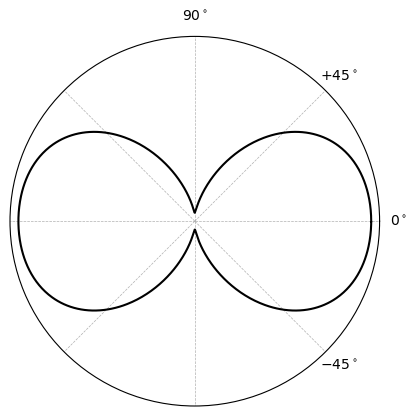

In [6]:
plt.polar(np.deg2rad(angles), A11s, 'k')
ax = plt.gca()
ax.set_yticks([])
ax.set_xticks(np.deg2rad([0, 45, 90, 135, 180, 225, 270, 315]))
ax.set_xticklabels([r"$0^\circ$", r"$+45^\circ$", r"$90^\circ$", "", "", "", "", r"$-45^\circ$"])
ax.grid(linestyle='--', lw=0.5)
plt.show()